In [43]:
import math
import torch
from lru.linear import LRU
import matplotlib.pyplot as plt
import numpy as np


In [44]:
d_state = 200  # hidden state dimension
d_in = 100
d_out = 10
# d_model = 100 usually, d_in = d_out = d_model
seq_len = 10000  # input sequence length
batch_size = 32

In [45]:
lru = LRU(
    in_features=d_in,
    out_features=d_out,
    state_features=d_state,
    rmin=0.7,
    rmax=0.9,
    max_phase=math.pi / 2,
)

In [46]:
input_sequences = torch.randn((batch_size, seq_len, d_in)) # multiple sequences
x0 = torch.view_as_complex(
    torch.randn(batch_size, d_state, 2)
)

In [47]:
# slow loop implementation
output_sequences_loop = lru(input_sequences, mode="loop", state=x0)

In [48]:
# fast parallel scan implementation
output_sequences_scan = lru(input_sequences, mode="scan", state=x0)

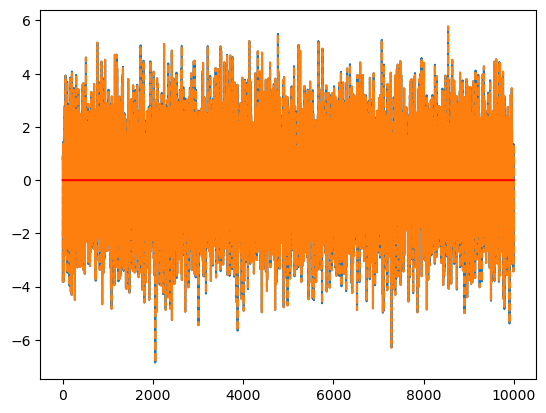

In [49]:
plt.plot(output_sequences_loop[0, :, 0].detach())
plt.plot(output_sequences_scan[0, :, 0].detach(), "--")
plt.plot(output_sequences_loop[0, :, 0].detach() - output_sequences_scan[0, :, 0].detach(), "r")

In [50]:
ss_params = lru.ss_params()
lambdas, B, C, D = [par.detach().numpy() for par in ss_params]

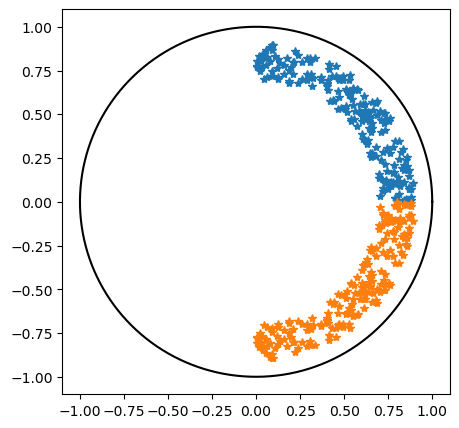

In [51]:
# poles (+ mirrored)
plt.figure(figsize=(5, 5))
t = np.linspace(0, 2*np.pi, 1000)
plt.plot(lambdas.real, lambdas.imag, "*")
plt.plot(lambdas.real, -lambdas.imag, "*")
plt.plot(np.cos(t), np.sin(t), "-k")